<a href="https://colab.research.google.com/github/alfredoEP/Redes-Neuronales-Duchanoy/blob/master/Copia_de_Red_vanilla_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de Tensorflow

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Importación de datos |

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data( )

### verificando los datos de prueba

In [0]:
y_train.shape

(60000,)

In [0]:
x_train.shape

(60000, 28, 28)

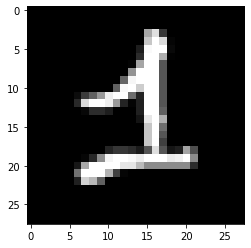

In [0]:
imagendemo=x_train[24]
plt.imshow(imagendemo,cmap='gray')

In [0]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) 
      for row in img]))

In [0]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0423305661014025   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   05023564770555901275   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   073956349564770647702295   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   011475647706477044370 510   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0102041820647706477021675   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   03723064770647706477021675  

Preparando los datos para el entrenamiento
 
La x debe ser convertida a un vector para que pueda ser procesada por la red perceptrón profunda 


In [0]:
x_train=x_train.reshape(-1,28*28).astype('float32')
x_test=x_test.reshape(-1,28*28).astype('float32')
x_train.shape

(60000, 784)

In [0]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Las salidas y deben se codificadas en one hot

In [0]:
# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

### Declarando la arquitectura

Generando función 

In [0]:
class DNN_model(object):
  def __init__(self,
               n_nodes_hl1=500,
               n_nodes_hl2=500,
               n_nodes_hl3=500,
               n_classes=10):
    self.h1LW = tf.Variable(np.random.rand(784, n_nodes_hl1),name="hl1weigths",dtype="float32")
    self.h1LB = tf.Variable(np.random.rand(n_nodes_hl1),name="hl1bias",dtype="float32")
    self.h2LW = tf.Variable(np.random.rand(n_nodes_hl1, n_nodes_hl2),name="hl2weigths",dtype="float32")
    self.h2LB = tf.Variable(np.random.rand(n_nodes_hl2),name="hl2bias",dtype="float32")
    self.h3LW = tf.Variable(np.random.rand(n_nodes_hl2, n_nodes_hl3),name="hl3weigths",dtype="float32")
    self.h3LB = tf.Variable(np.random.rand(n_nodes_hl3),name="hl3bias",dtype="float32")
    self.outW = tf.Variable(np.random.rand(n_nodes_hl3, n_classes),name="outweigths",dtype="float32")
    self.outB = tf.Variable(np.random.rand(n_classes),name="outbias",dtype="float32")
    self.trainable_variables =[self.h1LW,self.h1LB,self.h2LW,self.h2LB,self.h3LW,self.h3LB,self.outW,self.outB]          
  def __call__(self,x): 
      # Declarando la arquitectura

      l1 = tf.add(tf.matmul(x,self.h1LW), self.h1LB)
      l1 = tf.nn.relu(l1)

      l2 = tf.add(tf.matmul(l1,self.h2LW), self.h2LB)
      l2 = tf.nn.relu(l2)

      l3 = tf.add(tf.matmul(l2,self.h3LW), self.h3LB)
      l3 = tf.nn.relu(l3)

      output = tf.matmul(l3,self.outW) + self.outB
      return output
  

In [0]:
DNN = DNN_model()
DNN(x_train[24:30])

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[1.68576942e+11, 1.68257520e+11, 1.69268429e+11, 1.74542291e+11,
        1.76712155e+11, 1.70714202e+11, 1.68716501e+11, 1.75066022e+11,
        1.71204641e+11, 1.72010930e+11],
       [3.12308597e+11, 3.11716053e+11, 3.13589236e+11, 3.23359736e+11,
        3.27379583e+11, 3.16267561e+11, 3.12566514e+11, 3.24330553e+11,
        3.17176513e+11, 3.18669881e+11],
       [1.04213176e+11, 1.04015471e+11, 1.04640643e+11, 1.07900740e+11,
        1.09242155e+11, 1.05534112e+11, 1.04299430e+11, 1.08224831e+11,
        1.05837724e+11, 1.06335920e+11],
       [3.52327565e+11, 3.51659295e+11, 3.53772569e+11, 3.64794937e+11,
        3.69330127e+11, 3.56793975e+11, 3.52618545e+11, 3.65890241e+11,
        3.57819384e+11, 3.59504151e+11],
       [3.19309677e+11, 3.18704124e+11, 3.20619577e+11, 3.30608640e+11,
        3.34718927e+11, 3.23357213e+11, 3.19573492e+11, 3.31601150e+11,
        3.24287070e+11, 3.25813699e+11],
       [1.20686658e+11, 1.

Seleccionar un optimizador 

In [0]:
#optimizador = tf.keras.optimizers.Adam(learning_rate=.001 )
optimizador = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

### Definir las metricas a usar

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

### Calculo de gradientes y ajuste 

In [0]:
@tf.function
def train_step(model,tdata, labels):
  with tf.GradientTape() as tape:
    predictions = model(tdata)
    #calculo de una funcion de error 
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))
   
  gradients = tape.gradient(loss, model.trainable_variables)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  optimizador.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
#train_step(DNN,x_train[24:30], y_train_onehot[24:30])

In [0]:
@tf.function
def test_step(model,tdata, labels):
  predictions = model(tdata)
  t_loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [0]:
#test_step(DNN,x_train[24:30], y_train_onehot[24:30])

## función de entrenamiento  y prueba

In [0]:

def fitting(model,train_x,train_y,test_x,test_y,EPOCHS,N_batch,batch_size):
  for epoch in range(EPOCHS):
    i=0
    while i+batch_size < len(train_x) or i+batch_size<batch_size*N_batch:
      start = i
      end = i+batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model,batch_x,batch_y)
      i+=batch_size

    test_step(model,test_x,test_y)
      
    template = 'Epoch {}, Perdida: {}, Exactitud: {}, Perdida de prueba: {}, Exactitud de prueba: {}'
    print(template.format(epoch+1,
                         train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

  
    

In [0]:
fitting(DNN,x_train,y_train_onehot,x_test,y_test_onehot,10,600,100)

Epoch 1, Perdida: 156492352.0, Exactitud: 10.413188934326172, Perdida de prueba: 20556730.0, Exactitud de prueba: 11.0
Epoch 2, Perdida: 3673320.0, Exactitud: 40.54758071899414, Perdida de prueba: 623956.3125, Exactitud de prueba: 55.150001525878906
Epoch 3, Perdida: 466987.125, Exactitud: 66.09014892578125, Perdida de prueba: 378550.09375, Exactitud de prueba: 65.04000091552734
Epoch 4, Perdida: 267082.96875, Exactitud: 72.5559310913086, Perdida de prueba: 212277.484375, Exactitud de prueba: 74.8499984741211
Epoch 5, Perdida: 187900.671875, Exactitud: 78.15692901611328, Perdida de prueba: 117667.59375, Exactitud de prueba: 81.63999938964844
Epoch 6, Perdida: 121689.5078125, Exactitud: 81.8514175415039, Perdida de prueba: 117527.9140625, Exactitud de prueba: 81.70999908447266
Epoch 7, Perdida: 83679.828125, Exactitud: 84.28380584716797, Perdida de prueba: 49811.9375, Exactitud de prueba: 87.95999908447266
Epoch 8, Perdida: 46622.296875, Exactitud: 87.55426025390625, Perdida de prueba: 